# THE SPARKS FOUNDATION

## GRADUATE ROTATIONAL INTERNSHIP PROGRAM - GRIP

Data Science and Business Analytics intern


# AUTHOR: Yash Rana


# Task2: Prediction using Unsupervised Machine Learning 

In [1]:
##importing a library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing a dataset
df = pd.read_csv('Iris (1).csv')

In [3]:
#preprocessing 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.shape

(150, 6)

In [6]:
X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
X=X.values

# Finding the elbow point by training model on different number of clusters

In [7]:
from sklearn.cluster import KMeans
r=range(1,11)
inertias=[]
for i in r:
    model=KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualizing Data to find out the Elbow point which gives the ideal number of clusters

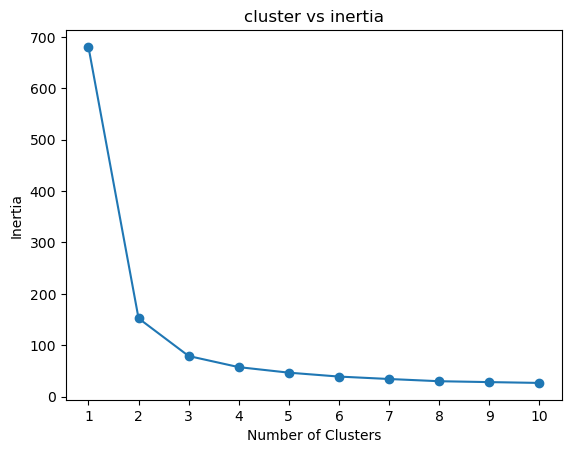

In [8]:
plt.plot(r,inertias,'-o')
plt.title('cluster vs inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(r)
plt.show()


In [9]:
model=KMeans(n_clusters=3)
model.fit(X)
pred=model.predict(X)

# Plotting the Clusters formed by the model

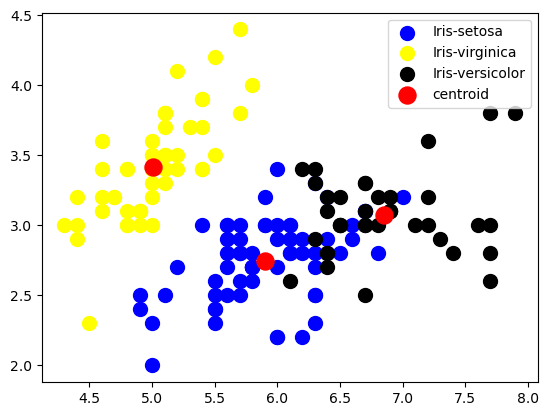

In [10]:
plt.scatter(X[pred==0,0],X[pred==0,1],c='blue',label='Iris-setosa',s=100)
plt.scatter(X[pred==1,0],X[pred==1,1],c='yellow',label='Iris-virginica',s=100)
plt.scatter(X[pred==2,0],X[pred==2,1],c='black',label='Iris-versicolor',s=100)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='red',s=150,label='centroid')
plt.legend()
plt.show()

# Scaling the data for better clustering and Training

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler(copy=True,with_mean=True,with_std=True)
kmeans=KMeans(n_clusters=3)
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [12]:
pp=pipeline.predict(X)

# Visualizing the Clusters Formed After Scaling

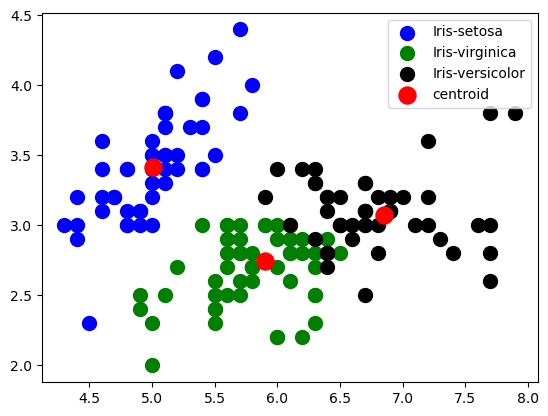

In [13]:
plt.scatter(X[pp==0,0],X[pp==0,1],c='blue',label='Iris-setosa',s=100)
plt.scatter(X[pp==1,0],X[pp==1,1],c='green',label='Iris-virginica',s=100)
plt.scatter(X[pp==2,0],X[pp==2,1],c='black',label='Iris-versicolor',s=100)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='red',s=150,label='centroid')
plt.legend()
plt.show()